# This notebook shows the codes for the "Network embedding" module

In [1]:
%pip install -q -r requirements2.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
sys.path.append("../..")
import pandas as pd
import os
from src.embedding.fast_network_embedding import *
from src.eda.eda_functions import (plot_gene_cnt_each_cluster, get_closest_genes_jaccard, plot_dist,
                                   plot_sig_perc, cluster_phenotype_corr,
                                   cluster_jaccard_v2, run_kmeans, cluster_DE_perc, cluster_nmi_v3,
                                   plot_gene_cnt_each_cluster_v2, plot_cluster_nmi_comparison_v3)
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
from sys import platform 
prefix = 'G:' if platform == 'win32' else '/Volumes/GoogleDrive'

# Run embedding

In [26]:
%%time
emb_df = network_embedding_fast(prefix+'/Shared drives/NIAAA_ASSIST/Data/Kapoor_TOM.csv',
                                max_epoch=100, learning_rate=0.1,
                                output_path=prefix+'/Shared drives/NIAAA_ASSIST/Data/embedding_derived/embedding_Feb16/embedding.csv')

embedding data saved
Wall time: 2h 34min 49s


# Evaluate embedding quality by looking at the biological relevance (compare these to the results from network analysis)

In [6]:
deseq = pd.read_excel(prefix + '/Shared drives/NIAAA_ASSIST/Data/deseq.alc.vs.control.age.rin.batch.gender.PMI.corrected.w.prot.coding.gene.name.xlsx')
deseq['abs_log2FC'] = abs(deseq['log2FoldChange'])

In [7]:
# module assignment from the "Network module analysis" notebook
louvain_module = pd.read_csv(prefix+'/Shared drives/NIAAA_ASSIST/Data/eda_derived/network_louvain_default.csv')

In [9]:
# run k means clustering on the embedding so we can compare the network modules and the embedding clusters
k = len(louvain_module['louvain_label'].unique())
kmeans = run_kmeans(emb_df, k)

In [10]:
emb_name = 'epoch=100_alpha=0.1'

## Evaluation 1: compare # of genes per network module vs # of genes per embedding cluster

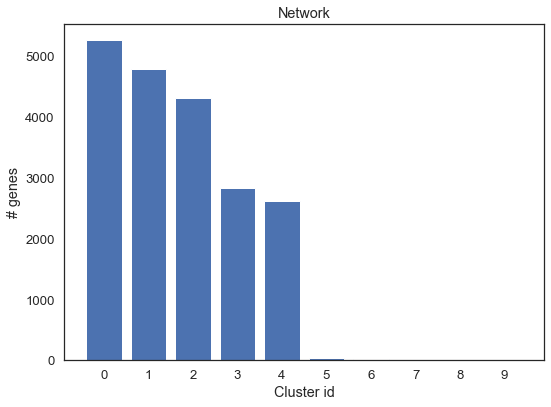

In [13]:
plot_gene_cnt_each_cluster_v2(louvain_module, 'louvain_label', 'Network', '_network')

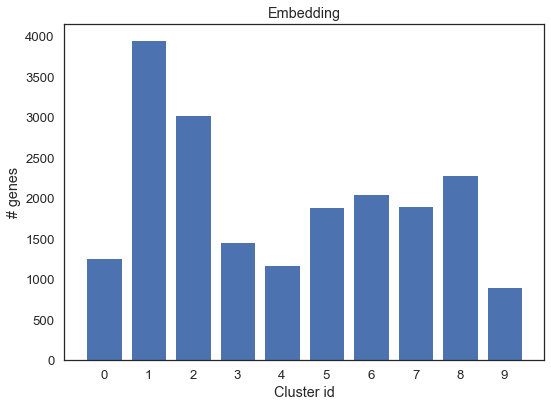

In [14]:
# note that cluster 0 in an embedding is not the same as cluster 0 in the network 
plot_gene_cnt_each_cluster_v2(kmeans, 'kmean_label', 'Embedding', '_embedding')

## Evaluation 2: compare percentage of DEGs per network module vs percentage of DEGs per embedding cluster

Removing existing folder: output
Created folder output


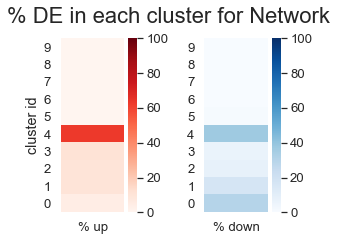

In [11]:
cluster_DE_perc(louvain_module, 'louvain_label', 'Network', deseq)

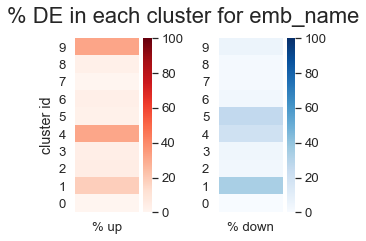

In [12]:
cluster_DE_perc(kmeans, 'kmean_label', 'emb_name', deseq)

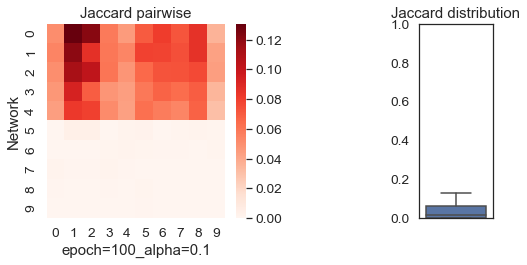

In [15]:
cluster_jaccard_v2(louvain_module, kmeans, 'louvain_label', 'kmean_label', ['Network', emb_name])

In [16]:
expression_meta = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/expression_meta.csv', low_memory = False)

## Evaluation 3: Module eigengene and alcohol trait correlation for each network module vs module eigengene and alcohol trait correlation for each embedding cluster

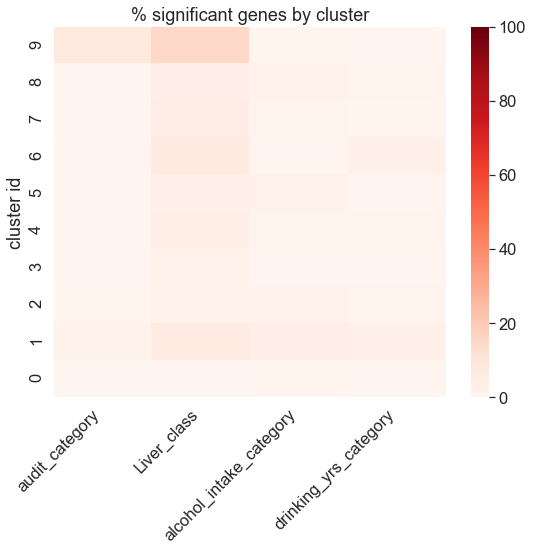

Wall time: 4min 20s


In [18]:
%%time
plot_sig_perc(kmeans, 'kmean_label', emb_name, expression_meta)

## Evaluation 4: Percentage of significant genes for each network module vs percentage of significant genes for each embedding cluster

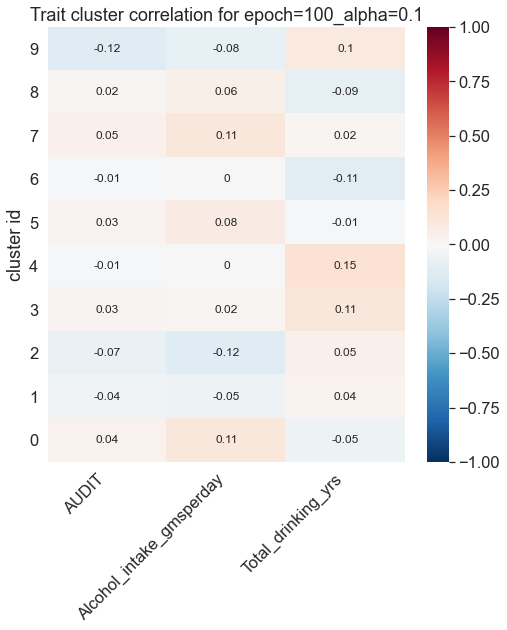

Wall time: 4.88 s


In [19]:
%%time
cluster_phenotype_corr(kmeans, 'kmean_label', emb_name, expression_meta)

In [21]:
print('NMI between network modules and embedding clusters is')
cluster_nmi_v3(louvain_module, 'louvain_label', kmeans, 'kmean_label')

NMI between network modules and embedding clusters is


0.5462611182657077